In [1]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime Library
from datetime import date

# Helper Functions
import acquire, explore

# Environment File
import env

# Warnings
import warnings
warnings.filterwarnings("ignore")

## Benchmark Indexes
### Introduction
#### Index
- Thousands of indexes track the movements of various sectors, markets, and investment strategies on a daily basis, and are used to determine that market's health and performance.
- There are approximately 5000 U.S. indexes.
- Using an index, it is possible to see how much value an active manager adds and from where, or through what investments, that value comes. 

<table>
    <tr>
        <th>Index</th>
        <th>Origin</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Dow Jones Industrial Average (DJIA)</td>
        <td>U.S.</td>
        <td><b>Price-weighted average</b> of 30 publicly traded U.S. "blue chip" stocks</td>
    </tr>
     <tr>
        <td>NASDAQ Composite</td>
        <td>U.S.</td>
         <td><b>Market capitalization-weighted index</b> of approximately 3,000 common equilities listed on the NASDAQ stock exchange</td>
    </tr>
    <tr>
        <td>S&P 500</td>
        <td>U.S.</td>
        <td><b>Market capitalization-weighted index</b> that tracks the performance of 500 U.S. large-cap stocks</td>
    </tr>
    <tr>
        <td>FTSE 100</td>
        <td>UK</td>
        <td><b>Market-capitalization-weighted index</b> of the 100 largest UK companies traded on the London Stock Exchange</td>
    </tr>
    <tr>
        <td>MSCI World Index</td>
        <td>Global Equilites</td>
        <td><b>Free float-adjusted market capitalization index</b>, consisting of 23 developed market country indexes</td>
    </tr>
     <tr>
        <td>Russell 2000</td>
        <td>U.S.</td>
        <td></td>
</table>

**Market capitalization**: the total amount of money company is valued in the stock market. It is calculated by the number of shares a company has times the price the stocks are selling at. 

#### Russell 2000 Index
- Russell 2000 index measures the performance of the 2000 smaller companies that are included in the Rusell 3000 index, which itself is made up of nearly all U.S. stocks. 
- It is made up of the bottom two-thirds in company size of the Russell 3000 index.
- It is widely regarded as a bellwether of the U.S. economy.

#### DJIA
- A stock market index that tracks 30 large, publicly-onwed blue-chip companies trading on the NYSE and the NASDAQ. 

#### Reference
- [Benchmarks](https://www.pimco.com/en-us/resources/education/understanding-benchmarks/)
- <a href="https://finance.yahoo.com/world-indices/">Major World Indices</a>
- [Market Cap and Why Is it Important](https://www.thebalance.com/market-capitalization-3305826)
- [Russell 2000 Index](https://www.investopedia.com/terms/r/russell2000.asp)
- [Dow Jones Industrial Average (DJIA)](https://www.investopedia.com/terms/d/djia.asp)
- [An Introduction to U.S. Stock Market Indexes](https://www.investopedia.com/insights/introduction-to-stock-market-indices/)

### Acquire the Historical Data of Major Indexes

In [2]:
%%time
# Create a list of benchmark index symbols
symbols = ['^GSPC', '^DJI', '^IXIC', '^RUT']

# Define the start and end date
start_date = "1995-01-01"
end_date = date.today()

# Acquire their adjusted closing price
df_marks = acquire.acquire_stock_data(symbols, 'yahoo', start_date, end_date)

# Print the number of records
print(df_marks.shape[0])

# Create a list of benchmark index names
benchmarks = ['SP500', 'Dow30', 'Nasdaq Composite', 'Russell2000']

# Rename the columns as bechmark index names
df_marks.columns = benchmarks

# Inspect the tail of the dataframe
df_marks.tail()

6602
CPU times: user 503 ms, sys: 68.1 ms, total: 571 ms
Wall time: 4.46 s


,SP500,Dow30,Nasdaq Composite,Russell2000
Date,,,,
2021-03-17,3974.120117,33015.371094,13525.200195,2336.389893
2021-03-18,3915.459961,32862.300781,13116.169922,2267.590088
2021-03-19,3913.100098,32627.970703,13215.240234,2287.550049
2021-03-22,3940.590088,32731.199219,13377.540039,2266.840088
2021-03-23,3947.629883,32714.169922,13401.043945,2221.626221


In [3]:
# Inspect the head of the dataframe
df_marks.head()

,SP500,Dow30,Nasdaq Composite,Russell2000
Date,,,,
1995-01-03,459.109985,3838.479980,743.580017,247.240005
1995-01-04,460.709991,3857.649902,745.840027,247.649994
1995-01-05,460.339996,3850.919922,745.659973,247.460007
1995-01-06,460.679993,3867.409912,749.690002,248.080002
1995-01-09,460.829987,3861.350098,752.090027,248.369995


In [4]:
# Print the concise summary
df_marks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6602 entries, 1995-01-03 to 2021-03-23
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SP500             6602 non-null   float64
 1   Dow30             6602 non-null   float64
 2   Nasdaq Composite  6602 non-null   float64
 3   Russell2000       6602 non-null   float64
dtypes: float64(4)
memory usage: 257.9 KB


### Data Preparation

In [5]:
# Compute the number of the null values in each column
df_marks.isnull().sum(axis=0)

SP500               0
Dow30               0
Nasdaq Composite    0
Russell2000         0
dtype: int64

### Data Exploration

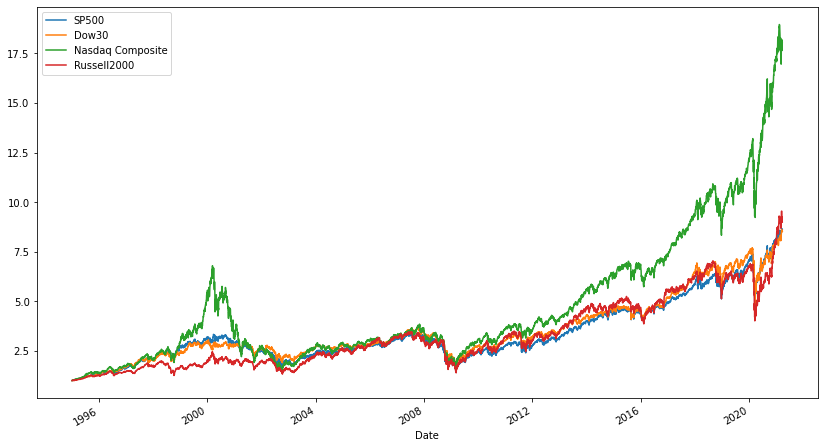

In [7]:
# Plot the growth of the major indexes since 1995

df_marks_1995 = df_marks.apply(lambda i: i/i.iloc[0], axis=0)
df_marks_1995.plot(figsize=(14,8))
# plt.axhline(y=1)
# plt.axhline(y=2, linestyle='--', alpha=0.5)
# plt.axhline(y=3, linestyle='--', alpha=0.5)
# plt.axhline(y=4, linestyle='--', alpha=0.5)
plt.show()

**Takeaways**
1. Today's stock market look like the dot-com bubble.

In [8]:
# # Save as csv file 

# database = env.database
# df_marks_1995.to_csv(f"{database}major_indexes.csv")

Enter the date:
2009-03-09


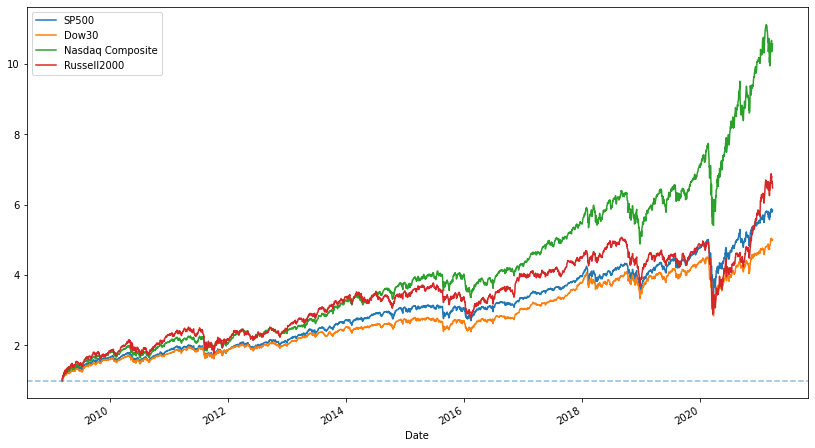

In [11]:
# Plot the growths of the major indexes by customizing the start date since 1995

print("Enter the date:")
start = input()

df_marks.loc[start:].apply(lambda i: i/i.iloc[0], axis=0).plot(figsize=(14,8))
plt.axhline(y=1, linestyle='--', alpha=0.5)
# plt.axhline(y=20000, linestyle='--', alpha=0.5)
# plt.axhline(y=30000, linestyle='--', alpha=0.5)
# plt.axhline(y=40000, linestyle='--', alpha=0.5)
plt.show()

**Takeaways**
1. The returns on the indexes depends on the where you start to invest.

In [63]:
# Add new columns for year, month, day, and day_name

df_marks = df_marks.assign(year = df_marks.index.year, 
                           month = df_marks.index.month,
                           day = df_marks.index.day,
                           day_name = df_marks.index.day_name())

# Sanity check
df_marks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5337 entries, 2000-01-03 to 2021-03-19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S&P500            5337 non-null   float64
 1   Dow 30            5337 non-null   float64
 2   Nasdaq Composite  5337 non-null   float64
 3   Russell 2000      5337 non-null   float64
 4   year              5337 non-null   int64  
 5   month             5337 non-null   int64  
 6   day               5337 non-null   int64  
 7   day_name          5337 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 504.3+ KB


In [64]:
# Group the observation by year
grouped_year = df_marks.groupby('year')

# Print the data type
type(grouped_year)

pandas.core.groupby.generic.DataFrameGroupBy

In [65]:
# Print all the group names
grouped_year.groups.keys()

dict_keys([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [66]:
# Print all the group names
grouped_year.indices.keys()

dict_keys([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

**Takeaways**
1. Pandas GroupBy objects have been created.
2. The name of each group is its year.
3. There are two ways to acess the group names. 

In [67]:
# Construct dataframe from group with provided name
# Take year 2000 for example

df_marks2000 = grouped_year.get_group(2000)
df_marks2000

,S&P500,Dow 30,Nasdaq Composite,Russell 2000,year,month,day,day_name
Date,,,,,,,,
2000-01-03,1455.219971,11357.509766,4131.149902,496.420013,2000,1,3,Monday
2000-01-04,1399.420044,10997.929688,3901.689941,478.380005,2000,1,4,Tuesday
2000-01-05,1402.109985,11122.650391,3877.540039,478.829987,2000,1,5,Wednesday
2000-01-06,1403.449951,11253.259766,3727.129883,475.339996,2000,1,6,Thursday
2000-01-07,1441.469971,11522.559570,3882.620117,488.309998,2000,1,7,Friday
...,...,...,...,...,...,...,...,...
2000-12-22,1305.949951,10635.559570,2517.020020,462.989990,2000,12,22,Friday
2000-12-26,1315.189941,10692.440430,2493.520020,466.630005,2000,12,26,Tuesday
2000-12-27,1328.920044,10803.160156,2539.350098,479.299988,2000,12,27,Wednesday


In [68]:
# Compute the relative prices using the first day of year as the base for year 2000
df_marks2000[benchmarks].apply(lambda i: i*10000/i.iloc[1], axis=0)

,S&P500,Dow 30,Nasdaq Composite,Russell 2000
Date,,,,
2000-01-03,10398.736084,10326.952516,10588.104038,10377.106241
2000-01-04,10000.000000,10000.000000,10000.000000,10000.000000
2000-01-05,10019.221830,10113.403801,9938.103994,10009.406365
2000-01-06,10028.796981,10232.161948,9552.603971,9936.452015
2000-01-07,10300.481095,10477.026038,9951.124194,10207.575412
...,...,...,...,...
2000-12-22,9332.079791,9670.510607,6451.102105,9678.288923
2000-12-26,9398.107074,9722.230214,6390.871794,9754.379366
2000-12-27,9496.219878,9822.903458,6508.333916,10019.231216


In [69]:
# Compute the relative prices for each year

# Create a empty dataframe
df_marks_relative = pd.DataFrame()

# Create a list of years
years = list(grouped_year.groups.keys())

# For Loop through the years and compute the relative prices

for year in years:
    df_marks_year = grouped_year.get_group(year)
    df_marks_year = df_marks_year[benchmarks].apply(lambda i: i*10000/i.head(1).values, axis=0)
    df_marks_relative = pd.concat([df_marks_relative, df_marks_year])
    
# Sanity check
df_marks_relative

,S&P500,Dow 30,Nasdaq Composite,Russell 2000
Date,,,,
2000-01-03,10000.000000,10000.000000,10000.000000,10000.000000
2000-01-04,9616.553319,9683.398839,9444.561523,9636.597880
2000-01-05,9635.038094,9793.212262,9386.103460,9645.662415
2000-01-06,9644.246089,9908.210513,9022.015591,9575.359242
2000-01-07,9905.512567,10145.322177,9398.400467,9836.629958
...,...,...,...,...
2021-03-15,10724.980871,10903.116791,10599.490295,12128.874822
2021-03-16,10708.146043,10860.927743,10608.830294,11919.975635
2021-03-17,10738.978888,10923.600639,10651.063702,12006.669638


In [70]:
# Add new columns for year, month, day, and day_name

df_marks_relative = df_marks_relative.assign(year = df_marks_relative.index.year, 
                                             month = df_marks_relative.index.month,
                                             day = df_marks_relative.index.day,
                                             day_name = df_marks_relative.index.day_name())

# Sanity check
df_marks_relative.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5337 entries, 2000-01-03 to 2021-03-19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S&P500            5337 non-null   float64
 1   Dow 30            5337 non-null   float64
 2   Nasdaq Composite  5337 non-null   float64
 3   Russell 2000      5337 non-null   float64
 4   year              5337 non-null   int64  
 5   month             5337 non-null   int64  
 6   day               5337 non-null   int64  
 7   day_name          5337 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 375.3+ KB


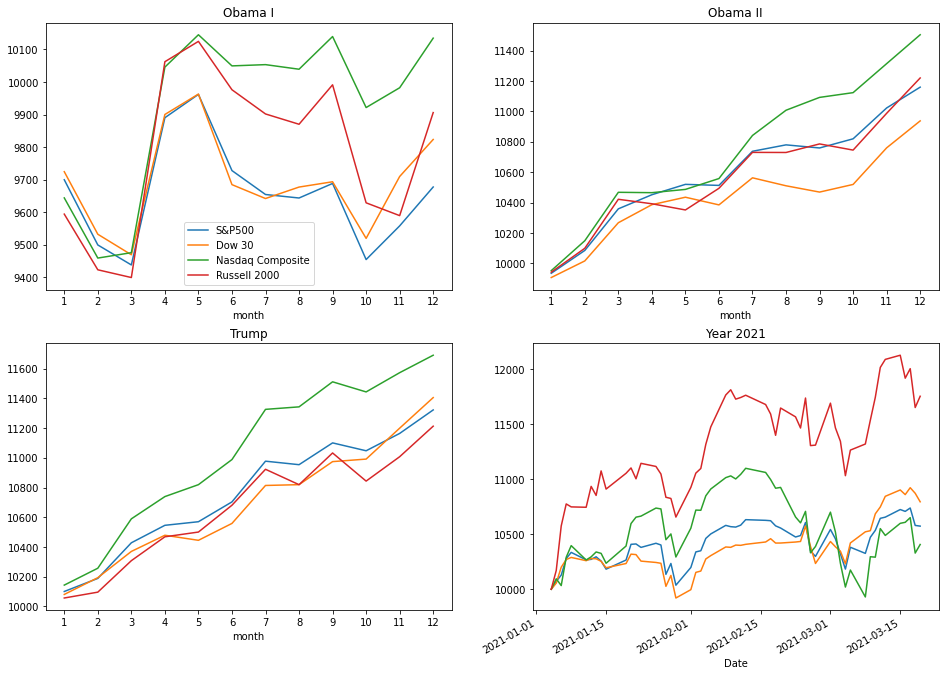

In [78]:
# Create the figures grids
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the figures grids
ax = ax.ravel()

# Adjust the benchmarks
benchmarks = ['S&P500', 'Dow 30', 'Nasdaq Composite', 'Russell 2000']

for benchmark in benchmarks:
    df_marks_relative.loc["2008": "2011"].groupby('month')[benchmark].mean().plot(ax=ax[0], legend=True)
    
for benchmark in benchmarks:
    df_marks_relative.loc["2012": "2016"].groupby('month')[benchmark].mean().plot(ax=ax[1], legend=False)
    
for benchmark in benchmarks:
    df_marks_relative.loc["2016": "2019"].groupby('month')[benchmark].mean().plot(ax=ax[2], legend=False)
    
for benchmark in benchmarks:    
    df_marks_relative.loc["2021"][benchmark].plot(ax=ax[3], legend=False)

ax[0].set_title("Obama I")
ax[1].set_title("Obama II")
ax[2].set_title("Trump")
ax[3].set_title("Year 2021")

ax[0].set_xticks([i for i in range(1,13)])
ax[1].set_xticks([i for i in range(1,13)])
ax[2].set_xticks([i for i in range(1,13)])
    
plt.show()

### Background

#### Index Fund
An <b>index fund</b> is a type of mutural fund or exchange-traded fund (ETF). It's made up of stocks or bonds attemting to earn the same return as a particular index.

Index funds are passively managed, which means that they typically hold waht's in the index (which rarely changes) to maximize returns and minimize costs. 

#### What is an ETF?
An ETF is a fund can be traded on an exchange like a stock, which means they can be bought and sold throughtout the trading day (unlike mutual funds, which are priced at the end of the trading day).

An ETF is a type of security that tracks an index, sector, commodity or other asset, but which can be purchased or sold on stock exchange the same as a regular stock.

ETF share prices fluctuate all day as the ETF is bought and sold and it is different from mutual funds that only trade once a day after the market closes.
#### How an ETF is structured? 
An ETF can be structured to track anything from the price of an individual commodity to a large and diverse collection of securities. 

ETFs can contain all types of investments including stocks, commodities, or bonds; some offter U.S. only holdings, while other are international. 

???Will the structure of ETF change over time???

#### Reference
- [Investing in Index Funds for Beginners](https://www.thebalance.com/investing-in-index-funds-for-beginners-356318)

### Actively Managed ETFs from ARK

In [2]:
%%time
# Create a list of interested stocks
arks = ['ARKK', 'ARKQ', 'ARKW', 'ARKG', 'ARKF']

# Creata a list of benchmark indexes
references = ['^GSPC', '^DJI', '^IXIC', 'VOOG','TSLA']

# Define start and end date
start_date = '2014-09-30'
end_date = date.today()

# Acquire their adjusted closing prices from yahoo finance
df_arks = acquire.acquire_stock_data(arks+references, 'yahoo', start_date, end_date)

# Inspect the dataframe
print(df_arks.shape)
df_arks.tail()

(1629, 10)
CPU times: user 642 ms, sys: 66.7 ms, total: 709 ms
Wall time: 5.6 s


,ARKK,ARKQ,ARKW,ARKG,ARKF,^GSPC,^DJI,^IXIC,VOOG,TSLA
Date,,,,,,,,,,
2021-03-15,128.880005,87.620003,160.740005,93.860001,55.189999,3968.939941,32953.460938,13459.709961,233.360001,707.940002
2021-03-16,126.019997,85.750000,157.929993,92.300003,54.950001,3962.709961,32825.949219,13471.570312,234.179993,676.880005
2021-03-17,127.459999,87.360001,159.809998,92.989998,55.419998,3974.120117,33015.371094,13525.200195,234.580002,701.809998
2021-03-18,120.070000,84.220001,150.710007,88.660004,52.410000,3915.459961,32862.300781,13116.169922,229.160004,653.159973
2021-03-19,122.360001,84.680000,153.339996,90.870003,53.250000,3913.100098,32627.970703,13215.240234,229.720001,654.869995


In [3]:
# Make a copy of the dataframe
df = df_arks.copy()

# Print the concise summary of the copied dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1629 entries, 2014-09-30 to 2021-03-19
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ARKK    1606 non-null   float64
 1   ARKQ    1629 non-null   float64
 2   ARKW    1629 non-null   float64
 3   ARKG    1606 non-null   float64
 4   ARKF    536 non-null    float64
 5   ^GSPC   1629 non-null   float64
 6   ^DJI    1629 non-null   float64
 7   ^IXIC   1629 non-null   float64
 8   VOOG    1629 non-null   float64
 9   TSLA    1629 non-null   float64
dtypes: float64(10)
memory usage: 140.0 KB


**Takeaways**: Those five ETFs have different inception dates.

In [4]:
# Add a new column to compute the average of the 5 active ETFs
df = df.assign(arks_avg = df[arks].mean(axis=1))

# Sanity check
df.tail()

,ARKK,ARKQ,ARKW,ARKG,ARKF,^GSPC,^DJI,^IXIC,VOOG,TSLA,arks_avg
Date,,,,,,,,,,,
2021-03-15,128.880005,87.620003,160.740005,93.860001,55.189999,3968.939941,32953.460938,13459.709961,233.360001,707.940002,105.258002
2021-03-16,126.019997,85.750000,157.929993,92.300003,54.950001,3962.709961,32825.949219,13471.570312,234.179993,676.880005,103.389999
2021-03-17,127.459999,87.360001,159.809998,92.989998,55.419998,3974.120117,33015.371094,13525.200195,234.580002,701.809998,104.607999
2021-03-18,120.070000,84.220001,150.710007,88.660004,52.410000,3915.459961,32862.300781,13116.169922,229.160004,653.159973,99.214002
2021-03-19,122.360001,84.680000,153.339996,90.870003,53.250000,3913.100098,32627.970703,13215.240234,229.720001,654.869995,100.900000


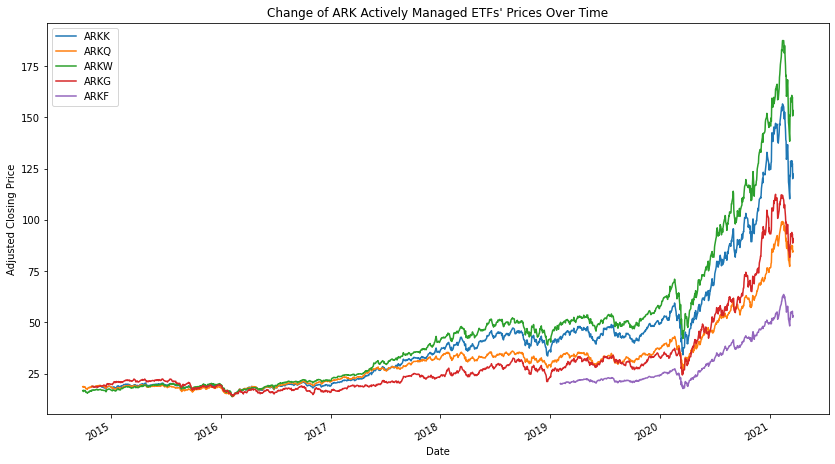

In [5]:
# Plot the prices of the 5 ETFs over time

df[arks].plot(figsize=(14,8))
plt.ylabel("Adjusted Closing Price")
plt.title("Change of ARK Actively Managed ETFs' Prices Over Time")
plt.show()

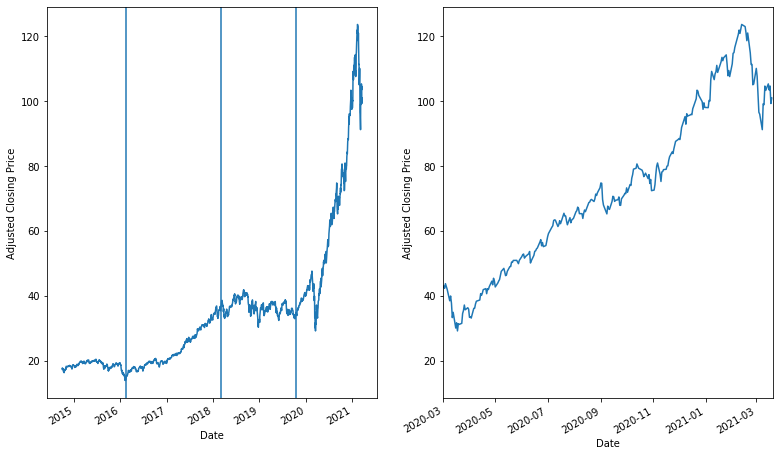

In [6]:
# Plot the mean over time and zoom in since the beginning of last March

# Set up the figure size
plt.figure(figsize=(13,8))

plt.subplot(121)
df.arks_avg.plot()
plt.ylabel("Adjusted Closing Price")
plt.axvline(x="2016-02-15")
plt.axvline(x="2018-03-01")
plt.axvline(x="2019-10-15")
# Extra plt.show() here will show the two plots in two rows. 

plt.subplot(122)
df.arks_avg.plot()
plt.ylabel("Adjusted Closing Price")
plt.xlim('2020-03-01', end_date)
plt.show()

**Takeaways**
1. The curve of the mean shows a flat-up-flat-up pattern. 
2. Since March 2020, the price of the ARK's ETFs increased about 2.5 folds on average. 

In [10]:
# Scale the adjusted closing prices and indexes using today's value as the reference
df_scaled = df.apply(lambda i: i*10000/i.tail(1).values, axis=0)

# Inspect the scaled dataframe
df_scaled.tail()

,ARKK,ARKQ,ARKW,ARKG,ARKF,^GSPC,^DJI,^IXIC,VOOG,TSLA,arks_avg
Date,,,,,,,,,,,
2021-03-15,10532.854220,10347.189706,10482.588322,10329.041243,10364.318991,10142.699758,10099.758038,10184.990755,10158.453742,10810.389966,10431.913030
2021-03-16,10299.117033,10126.358017,10299.334580,10157.367697,10319.248970,10126.778927,10060.677545,10193.965508,10194.149026,10336.097392,10246.778853
2021-03-17,10416.802750,10316.485628,10421.938266,10233.299775,10407.511393,10155.937794,10118.732603,10234.547352,10211.561927,10716.783526,10367.492434
2021-03-18,9812.847262,9945.677954,9828.486391,9756.795530,9842.253492,10006.030674,10071.818772,9925.033287,9975.622603,9973.887612,9832.904086
2021-03-19,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000


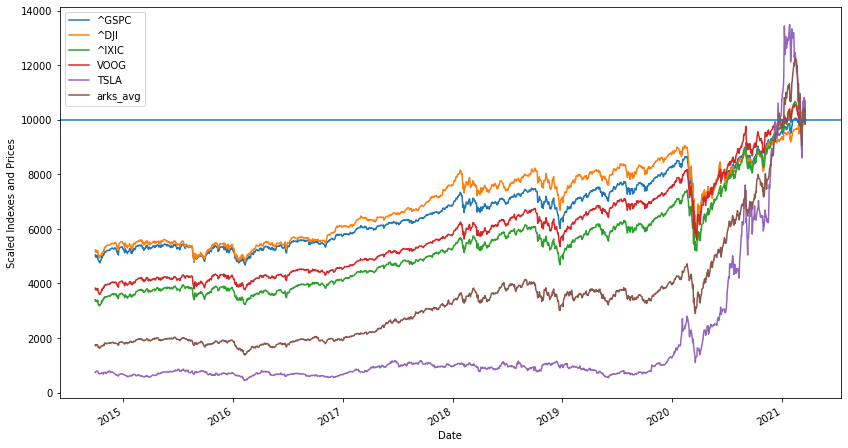

In [12]:
# Plot the scaled indexes and the mean of ETFs

cols = references + ['arks_avg']

df_scaled[cols].plot(figsize=(14,8))
plt.axhline(y=10000)
plt.ylabel("Scaled Indexes and Prices")
plt.show()

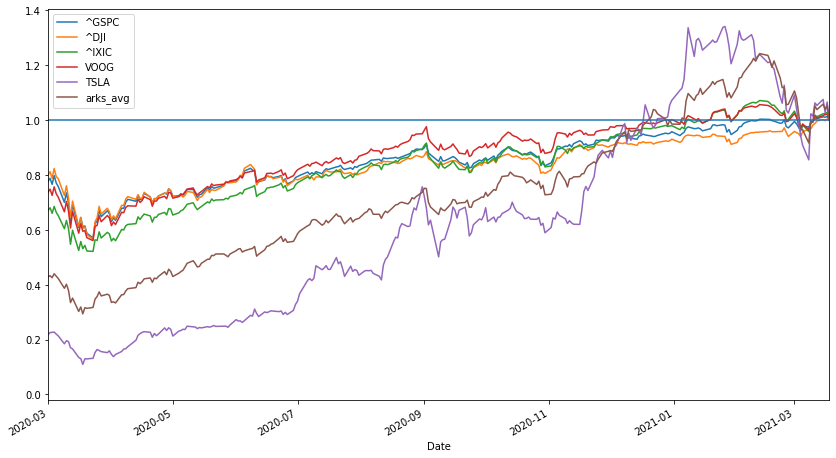

In [12]:
# Plot the scaled indexes and the mean of ETFs since March 2020

df_scaled[cols].plot(figsize=(14,8))
plt.axhline(y=1.0)
plt.xlim("2020-03-01", end_date)
plt.show()

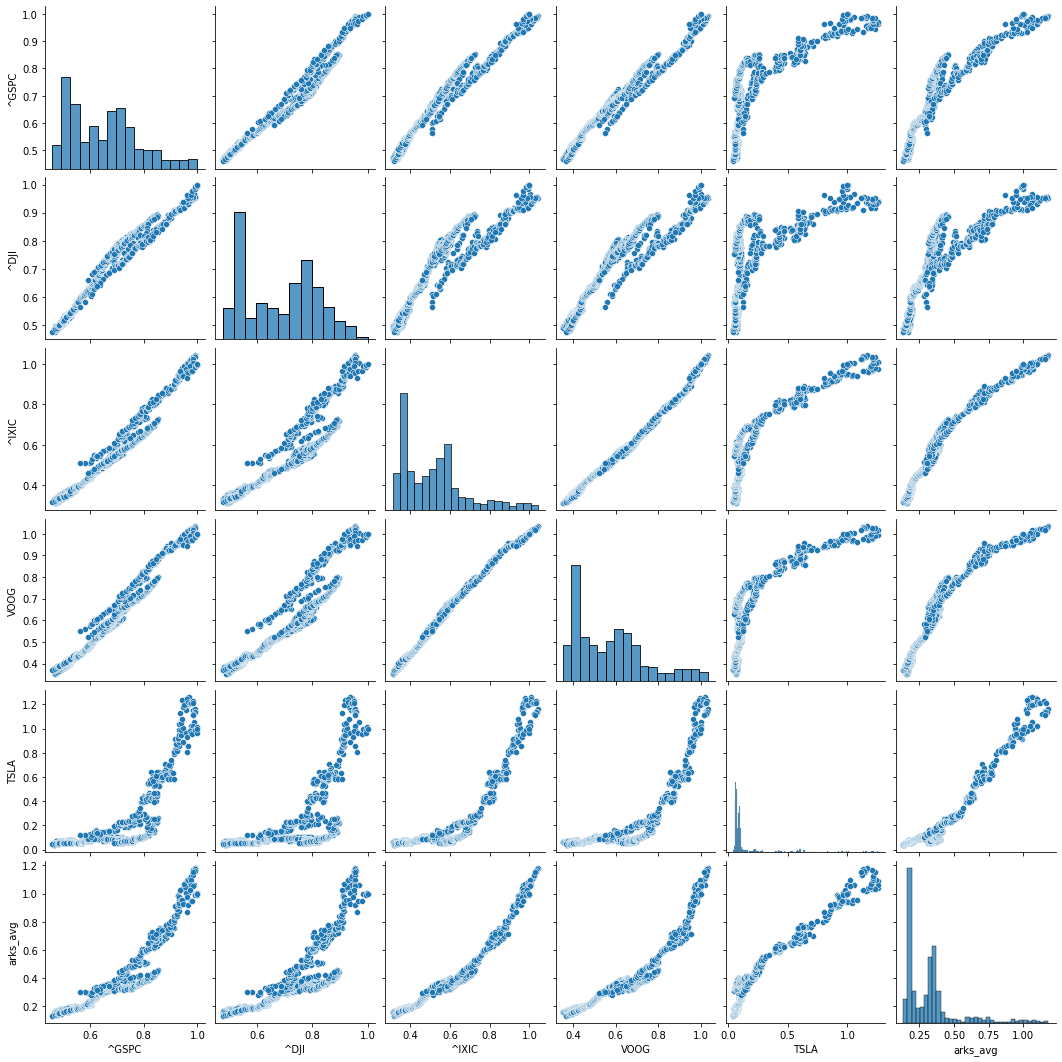

In [101]:
# Plot pairwise relationships in the dataset

sns.pairplot(df_scaled[cols], dropna=True)
plt.show()

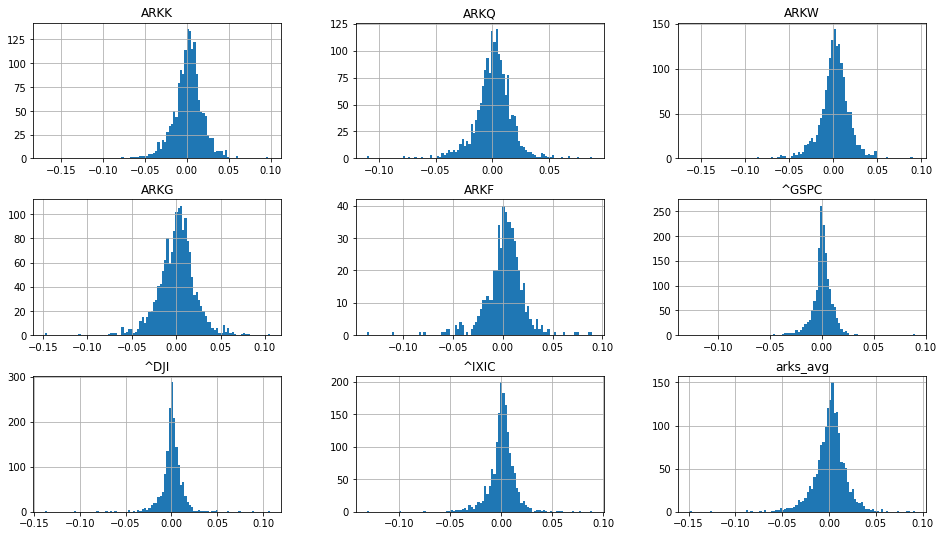

In [60]:
# Compute the daily returns of the ETFs

returns_d = np.log(df/df.shift(1))
returns_d.hist(figsize=(16,9), bins=100)
plt.show()

### Breaking Down ARKK Holdings

In [2]:
# Load the file path
database = env.database

# Load the fund holding for ARKK
df_arkk_holdings = pd.read_csv(f"{database}/arkk_holdings.csv")

# Print the number of holdings
print("Number of Holdings: ", df_arkk_holdings.shape[0])

Number of Holdings:  59


In [3]:
# Print the top 10 holdings
df_arkk_holdings.head(10)

,date,fund,company,ticker,cusip,shares,market value($),weight(%)
0,3/19/2021,ARKK,TESLA INC,TSLA,88160R101,3741354.0,2.443703e+09,10.54
1,3/19/2021,ARKK,SQUARE INC - A,SQ,852234103,6500409.0,1.458042e+09,6.29
2,3/19/2021,ARKK,TELADOC HEALTH INC,TDOC,87918A105,7489977.0,1.388866e+09,5.99
3,3/19/2021,ARKK,ROKU INC,ROKU,77543R102,3778308.0,1.291992e+09,5.57
4,3/19/2021,ARKK,BAIDU INC - SPON ADR,BIDU,056752108,3096671.0,8.201533e+08,3.54
5,3/19/2021,ARKK,ZILLOW GROUP INC - C,Z,98954M200,6092385.0,8.028545e+08,3.46
6,3/19/2021,ARKK,SPOTIFY TECHNOLOGY SA,SPOT,L8681T102,2705879.0,7.352685e+08,3.17
7,3/19/2021,ARKK,SHOPIFY INC - CLASS A,SHOP,82509L107,642038.0,7.172206e+08,3.09
8,3/19/2021,ARKK,CRISPR THERAPEUTICS AG,CRSP,H17182108,5588951.0,6.906267e+08,2.98
9,3/19/2021,ARKK,ZOOM VIDEO COMMUNICATIONS-A,ZM,98980L101,2175738.0,6.882294e+08,2.97


In [4]:
# Print the concise information
df_arkk_holdings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             57 non-null     object 
 1   fund             56 non-null     object 
 2   company          56 non-null     object 
 3   ticker           55 non-null     object 
 4   cusip            56 non-null     object 
 5   shares           56 non-null     float64
 6   market value($)  56 non-null     float64
 7   weight(%)        56 non-null     float64
dtypes: float64(3), object(5)
memory usage: 3.8+ KB


**Takeaway**
1. Comparing with the information of last december, the number of holdings changes from 48 to 59 and the weights(%) of the top 10 holdings also vary. 
3. Null vlaues are observed in all columns. 
4. The date is in object format, which may need to change to datetime. 

In [5]:
%%time
# Use the helper function to clean and compute the inception date and 
# return of each holding since ARKK commenced operation

df_arkk = explore.arkk_holding_return(df_arkk_holdings)

# Print the concise information of the new dataframe
df_arkk.info()

  0%|          | 0/55 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 55
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             55 non-null     object        
 1   fund             55 non-null     object        
 2   company          55 non-null     object        
 3   ticker           55 non-null     object        
 4   cusip            55 non-null     object        
 5   shares           55 non-null     float64       
 6   market value($)  55 non-null     float64       
 7   weight(%)        55 non-null     float64       
 8   inception_date   55 non-null     datetime64[ns]
 9   returns          55 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 4.7+ KB
CPU times: user 3.11 s, sys: 300 ms, total: 3.41 s
Wall time: 53.1 s


In [6]:
# Inspect the first 5 holdings
df_arkk.head()

,date,fund,company,ticker,cusip,shares,market value($),weight(%),inception_date,returns
0,3/19/2021,ARKK,TESLA INC,TSLA,88160R101,3741354.0,2.443703e+09,10.54,2014-10-31,13.547166
1,3/19/2021,ARKK,SQUARE INC - A,SQ,852234103,6500409.0,1.458042e+09,6.29,2015-11-19,17.202755
2,3/19/2021,ARKK,TELADOC HEALTH INC,TDOC,87918A105,7489977.0,1.388866e+09,5.99,2015-06-30,10.051579
3,3/19/2021,ARKK,ROKU INC,ROKU,77543R102,3778308.0,1.291992e+09,5.57,2017-09-28,14.787660
4,3/19/2021,ARKK,BAIDU INC - SPON ADR,BIDU,056752108,3096671.0,8.201533e+08,3.54,2014-10-31,1.078318
